Equipe:
Josué Lamec Vasconcelos Silva - 473547,
Ana Márcia de Lima - 497437,
Antônia Naelly Freire de Lima - 493823.

Escolha da base de dados:
A base de dados escolhida é um conjunto de dados de revisão de medicamentos "Drug Review Dataset (Drugs.com)"  que apresenta avaliações de usuários sobre medicamentos, incluindo informações sobre o nome do medicamento, condição médica, avaliação do tratamento, comentários e outros atributos relacionados. O conjunto de dados fornece análises de pacientes sobre medicamentos específicos, juntamente com condições relacionadas e uma classificação de 10 estrelas, refletindo a satisfação geral do paciente. Os dados foram obtidos rastreando sites de revisão farmacêutica online.

Link da base de dados: https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com

Problema escolhido:
Para o trabalho da disciplina, a equipe decidiu criar um algoritmo que recebe uma doença do usuário e sugere remédios para o seu tratamento, presentes na base de dados de acordo com o comentário feito sobre o respectivo remédio e sua avaliação.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from tabulate import tabulate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

Mounted at /content/drive


In [ ]:
# Os dados baixados através da base escolhida já vieram com o conjunto de teste e treinamento separados
# Caso queira executar na sua máquina, por favor, acesse o seguinte link: https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com
# Após fazer o download do conjunto de treino e de teste, adicione uma pasta no seu Google Drive chamda de IA e dentro da pasta adicione os dois arquivos
training_file_path = '/content/drive/MyDrive/IA/drugsComTrain_raw.tsv'
test_file_path = '/content/drive/MyDrive/IA/drugsComTest_raw.tsv'

In [ ]:
training_df = pd.read_csv(training_file_path, delimiter='\t')
test_df = pd.read_csv(test_file_path, delimiter='\t')

In [ ]:
training_df
#drugName é o nome do remédio
#condition é para que o remédio foi utilizado
#review é o comentário sobre a utilização
#rating é a nota de avaliação
#date é a data do registro
#usefulCount é a quantidade de usuários que acharam essa avaliação útil

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [ ]:
#pré-processamento

#vamos remover a coluna unnamed, review e date porque não iremos utilizar
training_df.drop(['Unnamed: 0', 'review', 'date'], axis=1, inplace=True)
test_df.drop(['Unnamed: 0', 'review', 'date'], axis=1, inplace=True)

In [ ]:
training_df

,drugName,condition,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,9.0,27
1,Guanfacine,ADHD,8.0,192
2,Lybrel,Birth Control,5.0,17
3,Ortho Evra,Birth Control,8.0,10
4,Buprenorphine / naloxone,Opiate Dependence,9.0,37
...,...,...,...,...
161292,Campral,Alcohol Dependence,10.0,125
161293,Metoclopramide,Nausea/Vomiting,1.0,34
161294,Orencia,Rheumatoid Arthritis,2.0,35
161295,Thyroid desiccated,Underactive Thyroid,10.0,79


In [ ]:
# Remove as linhas duplicadas
training_df = training_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [ ]:
# Foi observado que em algumas linhas, há na coluna "Condition" (Doença) o seguinte texto "</span> users found this comment helpful.", o que se faz necessário excluir essas linhas da base

# Converter os valores da coluna 'condition' em strings
training_df['condition'] = training_df['condition'].astype(str)
test_df['condition'] = test_df['condition'].astype(str)

# Remover linha em que 'condition' contém a frase "users found this comment helpful."
training_df = training_df[~training_df['condition'].str.contains("users found this comment helpful.")]
test_df = test_df[~test_df['condition'].str.contains("users found this comment helpful.")]

<ipython-input-86-12f746f9a69b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['condition'] = training_df['condition'].astype(str)


In [ ]:
#Removendo os dados onde a doença é nan e Not Listed / Othe
training_df = training_df[~training_df['condition'].isin(['nan', 'Not Listed / Othe'])]
test_df = test_df[~test_df['condition'].isin(['nan', 'Not Listed / Othe'])]

In [ ]:
#Renomear as colunas da tabela dos dados de treinamento
training_df['ID'] = training_df.reset_index().index
training_df = training_df.rename(columns={'drugName': 'Medicamento'})
training_df = training_df.rename(columns={'condition': 'Doença'})
training_df = training_df.rename(columns={'rating': 'Avaliação'})
training_df = training_df.rename(columns={'usefulCount': 'Utilidade da Avaliação'})
training_df.head()

,Medicamento,Doença,Avaliação,Utilidade da Avaliação,ID
0,Valsartan,Left Ventricular Dysfunction,9.0,27,0
1,Guanfacine,ADHD,8.0,192,1
2,Lybrel,Birth Control,5.0,17,2
3,Ortho Evra,Birth Control,8.0,10,3
4,Buprenorphine / naloxone,Opiate Dependence,9.0,37,4


In [ ]:
#Renomeando as colunas das tabelas dos dados de teste
test_df['ID'] = test_df.reset_index().index
test_df = test_df.rename(columns={'drugName': 'Medicamento'})
test_df = test_df.rename(columns={'condition': 'Doença'})
test_df = test_df.rename(columns={'rating': 'Avaliação'})
test_df = test_df.rename(columns={'usefulCount': 'Utilidade da Avaliação'})
test_df.head()

,Medicamento,Doença,Avaliação,Utilidade da Avaliação,ID
0,Mirtazapine,Depression,10.0,22,0
1,Mesalamine,"Crohn's Disease, Maintenance",8.0,17,1
2,Bactrim,Urinary Tract Infection,9.0,3,2
3,Contrave,Weight Loss,9.0,35,3
4,Cyclafem 1 / 35,Birth Control,9.0,4,4


In [ ]:
# Agrupando os medicamentos por doença e contando o número de medicamentos únicos
medicamentos_por_doenca_training = training_df.groupby('Doença')['Medicamento'].nunique()

# Ordenando os valores em ordem decrescente
medicamentos_por_doenca_training = medicamentos_por_doenca_training.sort_values(ascending=False)

print(medicamentos_por_doenca_training)

Doença
Pain                                            200
Birth Control                                   172
High Blood Pressure                             140
Acne                                            117
Depression                                      105
                                               ... 
Post-Cholecystectomy Diarrhea                     1
Breast Cancer, Palliative                         1
Postoperative Increased Intraocular Pressure      1
Postpartum Breast Pain                            1
Cachexia                                          1
Name: Medicamento, Length: 810, dtype: int64


In [ ]:
# Agrupando os medicamentos por doença e contando o número de medicamentos únicos
medicamentos_por_doenca_test = test_df.groupby('Doença')['Medicamento'].nunique()

# Ordenando os valores em ordem decrescente
medicamentos_por_doenca_test = medicamentos_por_doenca_test.sort_values(ascending=False)

print(medicamentos_por_doenca_test)

#agora é possível ver que os dados onde o remédio era nan ou Not Listed / Othe foram apagados

Doença
Pain                                            163
Birth Control                                   155
High Blood Pressure                              99
Depression                                       97
Acne                                             90
                                               ... 
Reversal of Nondepolarizing Muscle Relaxants      1
Lyme Disease, Erythema Chronicum Migrans          1
Dumping Syndrome                                  1
Salmonella Gastroenteritis                        1
Head and Neck Cance                               1
Name: Medicamento, Length: 663, dtype: int64


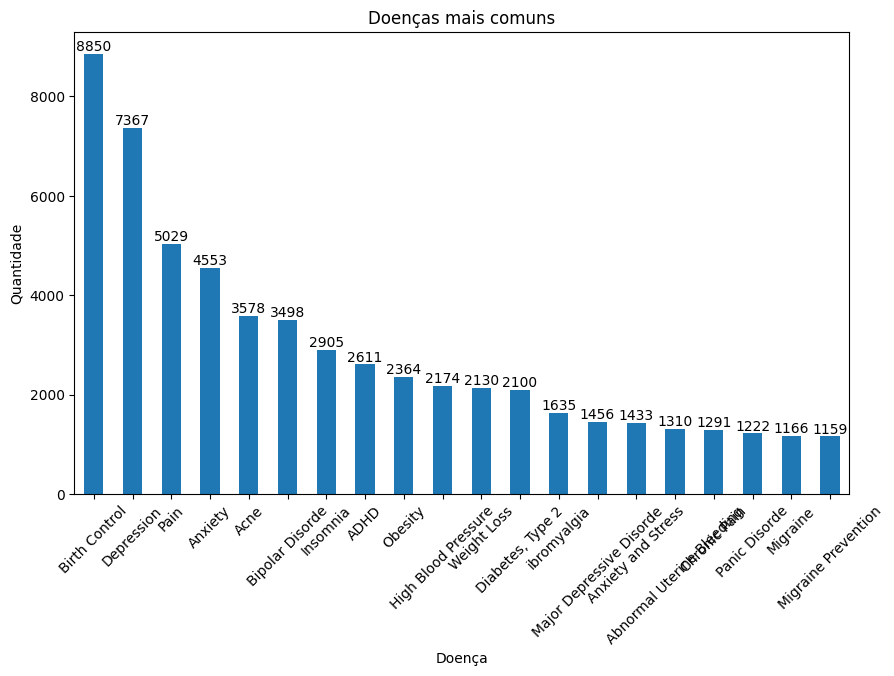

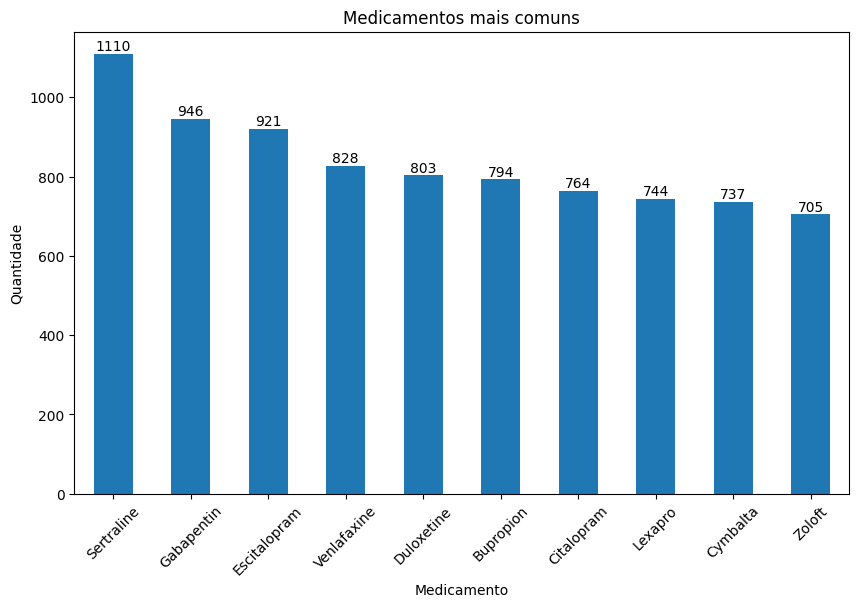

In [ ]:
#Explorando doenças mais comuns e medicamentos mais comuns (20)

doencas_count = training_df['Doença'].value_counts().head(20)

# Crie o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
doencas_count.plot(kind='bar')

# Adicione a quantidade exata em cada barra
for i, v in enumerate(doencas_count):
    ax.annotate(str(v), (i, v), ha='center', va='bottom')

plt.xlabel('Doença')
plt.ylabel('Quantidade')
plt.title('Doenças mais comuns')
plt.xticks(rotation=45)
plt.show()

medicamentos_count = training_df['Medicamento'].value_counts().head(10)

# Crie o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
medicamentos_count.plot(kind='bar')

# Adicione a quantidade exata em cada barra
for i, v in enumerate(medicamentos_count):
    ax.annotate(str(v), (i, v), ha='center', va='bottom')

plt.xlabel('Medicamento')
plt.ylabel('Quantidade')
plt.title('Medicamentos mais comuns')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Agrupando os dados por doença e calculando as estatísticas resumidas da utilidade da avaliação
estatisticas_utilidade_training = training_df.groupby('Doença')['Utilidade da Avaliação'].agg(['mean', 'median', 'count'])

# Exiba as estatísticas resumidas
print(estatisticas_utilidade_training)

                                  mean  median  count
Doença                                               
ADHD                         39.739946    28.0   2611
AIDS Related Wasting         29.800000     4.0      5
AV Heart Block                0.000000     0.0      1
Abdominal Distension          9.000000     9.0      2
Abnormal Uterine Bleeding    15.985496     9.0   1310
...                                ...     ...    ...
unctional Gastric Disorde     1.000000     1.0      1
ungal Infection Prophylaxis   0.000000     0.0      1
ungal Pneumonia               2.000000     2.0      1
von Willebrand's Disease      3.500000     4.5      6
zen Shoulde                  21.714286    12.5     14

[810 rows x 3 columns]


In [ ]:
# Agrupando os dados por nome do medicamento e calculando as estatísticas resumidas da utilidade da avaliação
estatisticas_utilidade_test = test_df.groupby('Medicamento')['Utilidade da Avaliação'].agg(['mean', 'median', 'count'])

# Exiba as estatísticas resumidas
print(estatisticas_utilidade_test)

                                           mean  median  count
Medicamento                                                   
A / B Otic                            18.000000    18.0      1
Abacavir / dolutegravir / lamivudine  15.437500    14.5     16
Abacavir / lamivudine                  3.500000     3.5      2
Abatacept                             29.166667    16.5      6
Abilify                               40.757143    26.5    140
...                                         ...     ...    ...
ZzzQuil                                1.000000     1.0      1
depo-subQ provera 104                  1.000000     1.0      1
ella                                   9.823529     9.0     17
femhrt                                12.333333     7.0      3
pHisoHex                               0.000000     0.0      1

[2627 rows x 3 columns]


In [ ]:
# Contagem de avaliações por doença no conjunto de treinamento
avaliacoes_por_doenca = training_df.groupby('Doença').size()

# Filtra o dataframe para manter apenas as linhas com mais de 100 avaliações por doença
doencas_frequentes = avaliacoes_por_doenca[avaliacoes_por_doenca >= 100].index
training_df = training_df[training_df['Doença'].isin(doencas_frequentes)]

# Contagem de avaliações por doença no conjunto de teste
avaliacoes_por_doenca_teste = test_df.groupby('Doença').size()

# Filtra o dataframe de teste para manter apenas as linhas com mais de 100 avaliações por doença
doencas_frequentes_teste = avaliacoes_por_doenca_teste[avaliacoes_por_doenca_teste >= 100].index
test_df = test_df[test_df['Doença'].isin(doencas_frequentes_teste)]

In [ ]:
# Divisão dos dados em features e target
features = training_df[['ID', 'Avaliação', 'Utilidade da Avaliação']]
target = training_df['Medicamento']

print(features)

            ID  Avaliação  Utilidade da Avaliação
1            1        8.0                     192
2            2        5.0                      17
3            3        8.0                      10
4            4        9.0                      37
5            5        2.0                      43
...        ...        ...                     ...
161291  112731        6.0                       0
161293  112732        1.0                      34
161294  112733        2.0                      35
161295  112734       10.0                      79
161296  112735        9.0                     116

[101440 rows x 3 columns]


In [ ]:
# Divisão dos dados
features = ['ID','Avaliação', 'Utilidade da Avaliação']
X_train = training_df[features]
y_train = training_df['Medicamento']

# Treinamento do modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Medidas de desempenho do modelo
X_test = test_df[features]
y_test = test_df['Medicamento']

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

0.004803235864161119


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0013369113953711485


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0011193649997650401
0.001128157972998893
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Recomendação do medicamento para uma doença específica

# Suponha que você queira recomendar um medicamento para a doença "Doença X" com avaliação 8 e utilidade da avaliação 20
doenca = 0
avaliacao = 8.0
utilidade = 10

# Cria um dataframe com as características da doença específica
dados_recomendacao = pd.DataFrame({'ID': [doenca],'Avaliação': [avaliacao], 'Utilidade da Avaliação': [utilidade]})

# Faz a previsão do medicamento adequado com base nas características fornecidas
medicamento_recomendado = model.predict(dados_recomendacao)

print("Medicamento recomendado:", medicamento_recomendado)

Medicamento recomendado: ['Ortho Evra']


Após analisar os dados obtidos como resultado, vimos que a Acurácia, que é uma medida utilizada para calcular a performance geral do modelo, foi baixa. O que indica que dentre as classificações, o modelo não conseguiu indicar corretamente a maioria dos registros. A Precisão, que indica as corretas classificações positivas, o Recall que indica o valor esperado positivo correto e o F1-Score que indica a média harmônica também mostraram baixos resultados.